# Regression Exercises

#### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

#### In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

>#### (1). Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.
>#### (2). Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

>#### (3). (Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.)




In [1]:
# Get all imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wrangle import get_zillow_data
from wrangle import wrangle_zillow

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Calling the main dataframe
zillow = get_zillow_data()

Program Status: Acquiring data from online resource...
Program Status: Saving resourced file to local csv file...


In [3]:
# Inspect the main dataframe 

zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
# Describe the data 

zillow.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [5]:
# Shape of data 

zillow.shape

(2152863, 7)

In [6]:
# Check for null values

zillow.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

## Clean, and split the data

In [7]:
train, validate, test = wrangle_zillow()

Program Status: Acquiring local cached zillow data..


In [8]:
train.shape, validate.shape, test.shape

((1198531, 7), (513657, 7), (428047, 7))

In [9]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1312812,3.0,2.0,1114.0,440101.0,1960.0,5358.41,6037.0
1370337,3.0,2.0,1526.0,566508.0,1956.0,6930.90,6111.0
1431269,5.0,3.0,2125.0,530517.0,1970.0,7091.26,6037.0
306865,3.0,2.0,2220.0,136904.0,1961.0,2281.73,6037.0
1138527,3.0,2.0,1243.0,120497.0,1971.0,1732.87,6037.0


In [10]:
train.columns.value_counts().isnull()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet    False
taxvaluedollarcnt               False
yearbuilt                       False
taxamount                       False
fips                            False
dtype: bool

In [11]:
# Any null value?

train.isnull().any()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet    False
taxvaluedollarcnt               False
yearbuilt                       False
taxamount                       False
fips                            False
dtype: bool

In [12]:
# Find the total number of Null values in each column of our DataFrame.
train.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [13]:
# Find the total number of Null values in each column of our DataFrame.
validate.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [14]:
# Find the total number of Null values in each column of our DataFrame.
test.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

<AxesSubplot:xlabel='yearbuilt'>

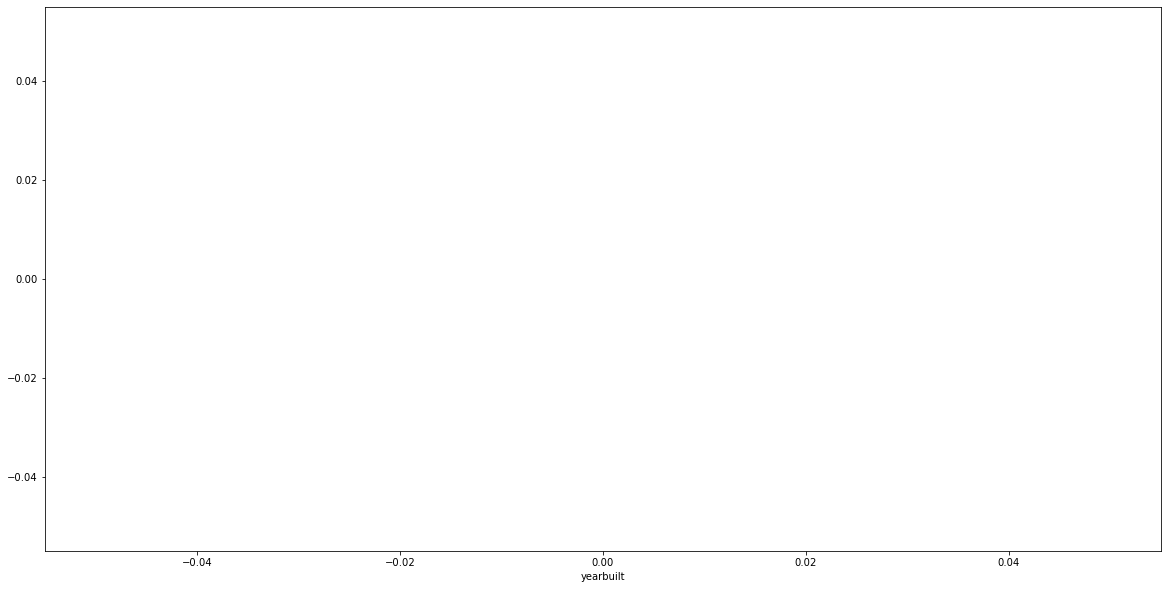

In [15]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = train, x = 'yearbuilt')

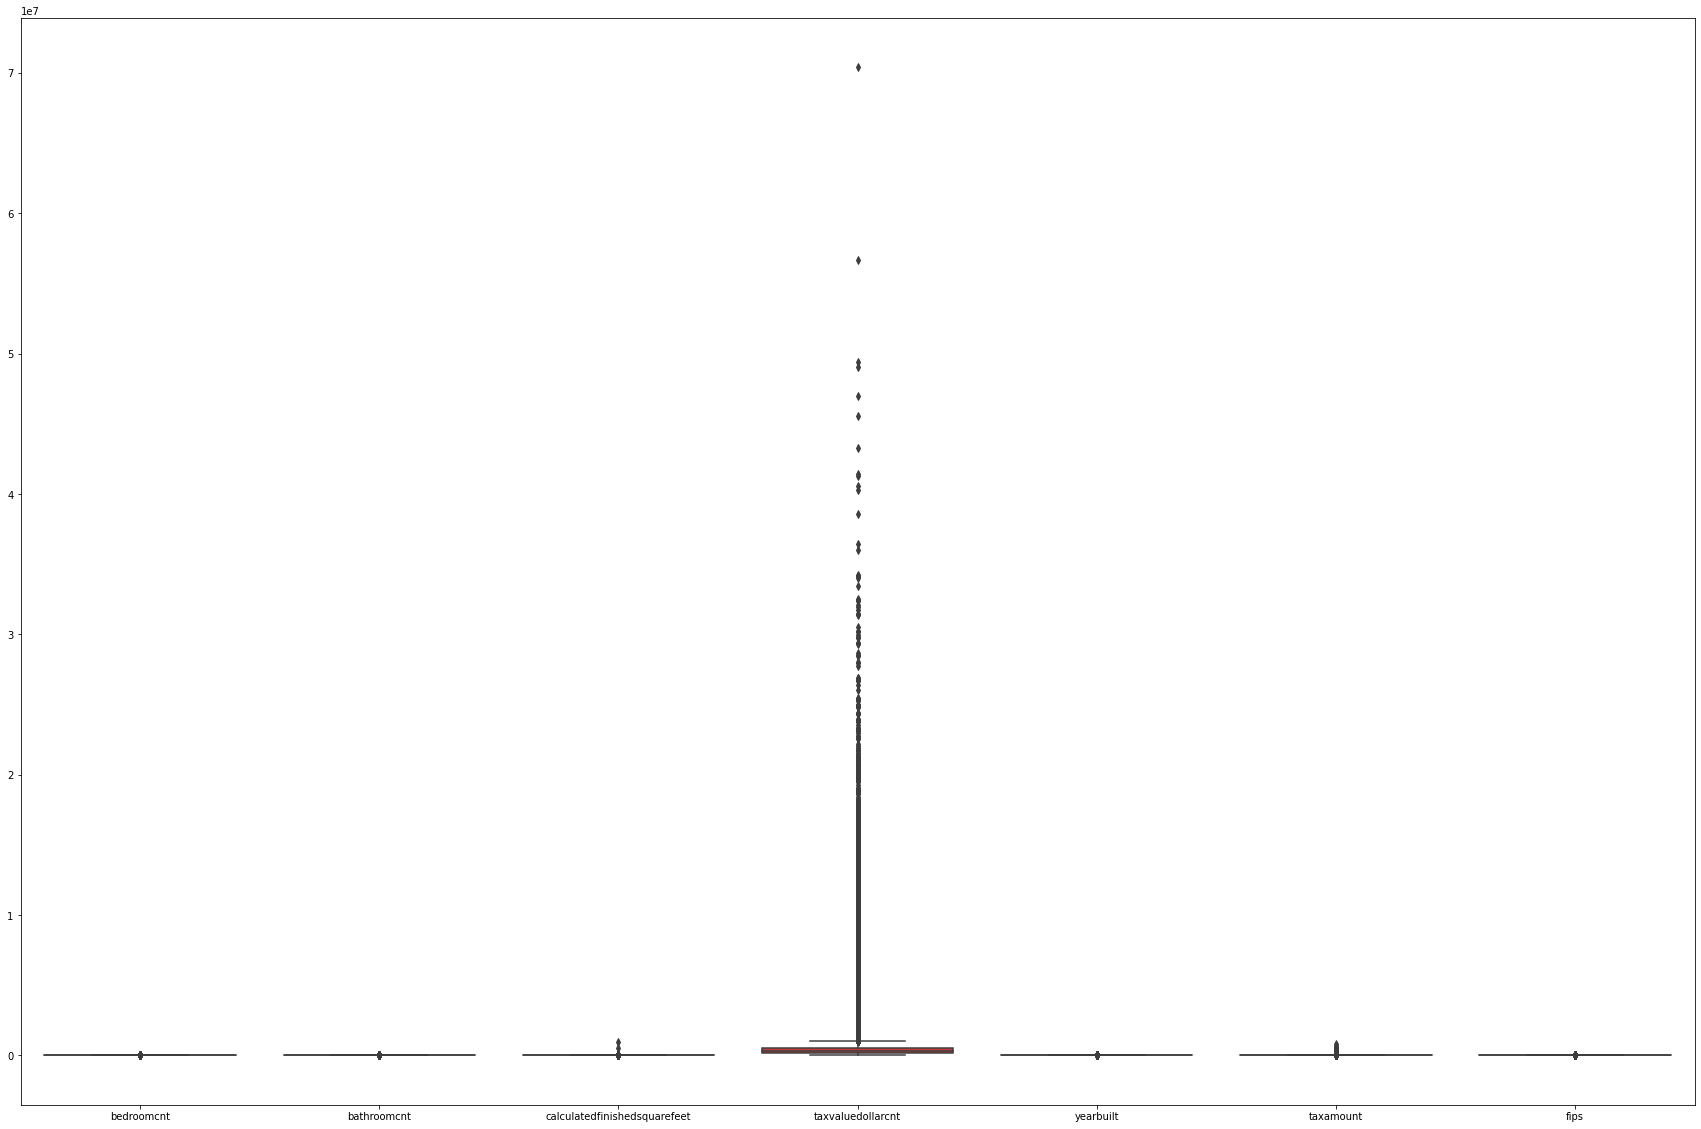

In [36]:
plt.figure(figsize = (30, 20))
sns.boxplot(data = train)
plt.show()

In [33]:
train.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1312812 to 364616
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1198531 non-null  float64
 1   bathroomcnt                   1198531 non-null  float64
 2   calculatedfinishedsquarefeet  1198531 non-null  float64
 3   taxvaluedollarcnt             1198531 non-null  float64
 4   yearbuilt                     1198531 non-null  float64
 5   taxamount                     1198531 non-null  float64
 6   fips                          1198531 non-null  float64
dtypes: float64(7)
memory usage: 73.2 MB
